# Analyse du dataset_GAB

## Importation des bibliothèques et Affichage des données

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('/Users/hadjer/Desktop/dataset_gab*.csv')
df

,nbr_semaine,saison,Plage_horaire,Gab_Code,GabAgence,CodeAgence,CodeWilaya,position_Geographique,Nbr_Transaction_Semaine,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,evenements
0,1,hiver,après-midi,800005027,"""CHERAGA \r""",17030,16,nord,104,1655000,0,0,jour de lan
1,1,hiver,après-midi,800010027,"""DAR EL BEIDA \r""",17070,16,nord,94,2169000,0,0,jour de lan
2,1,hiver,après-midi,800019027,"""ORAN USTO \r""",17100,31,ouest,78,1810000,0,0,jour de lan
3,1,hiver,après-midi,800022027,"""BEJAIA \r""",17130,6,est,48,709000,0,0,jour de lan
4,1,hiver,après-midi,800023027,"""BEJAIA \r""",17130,6,est,20,279000,0,0,jour de lan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18432,53,hiver,midi,800242027,"""AGENCE HO.BAB EZZOUAR \r""",17800,16,nord,1,2000,1,2000,inconnu
18433,53,hiver,soir,800029027,"""BORDJ EL KIFFAN \r""",17190,16,nord,52,638000,52,638000,inconnu
18434,53,hiver,soir,800043027,"""HASSI MESSAOUD \r""",17330,30,sud,1,2000,1,2000,inconnu
18435,53,hiver,soir,800145027,"""ORAN USTO \r""",17100,31,ouest,3,18000,3,18000,inconnu


### Vérification de l'existance de lignes doubles 

In [13]:
duplicate_rows = df[df.duplicated()]

# Afficher les lignes en double
print("Lignes en double :\n", duplicate_rows)

Lignes en double :
 Empty DataFrame
Columns: [nbr_semaine, saison, Plage_horaire, Gab_Code, GabAgence, CodeAgence, CodeWilaya, position_Geographique, Nbr_Transaction_Semaine, retrait_Semaine, Nbr_Transaction_Weekend, retrait_Weekend, evenements]
Index: []


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18437 entries, 0 to 18436
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   nbr_semaine              18437 non-null  int64 
 1   saison                   18437 non-null  object
 2   Plage_horaire            18437 non-null  object
 3   Gab_Code                 18437 non-null  int64 
 4   GabAgence                18437 non-null  object
 5   CodeAgence               18437 non-null  int64 
 6   CodeWilaya               18437 non-null  int64 
 7   position_Geographique    18437 non-null  object
 8   Nbr_Transaction_Semaine  18437 non-null  int64 
 9   retrait_Semaine          18437 non-null  int64 
 10  Nbr_Transaction_Weekend  18437 non-null  int64 
 11  retrait_Weekend          18437 non-null  int64 
 12  evenements               18437 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.8+ MB


##### On remarque qu'il n ya pas de valeurs manquantes.

# Exploration des données

### Analyse univariée

👉 Le premier type de variable que je vais explorer est les variables quantitatives:
##### 'retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 'Nbr_Transaction_Weekend'

In [15]:
numeric_variables = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                     'Nbr_Transaction_Weekend']

df_numeric=df[numeric_variables]
df_numeric.describe()

,retrait_Semaine,Nbr_Transaction_Semaine,retrait_Weekend,Nbr_Transaction_Weekend
count,1.843700e+04,18437.000000,1.843700e+04,18437.000000
mean,2.491392e+06,127.866301,6.241547e+05,32.823995
std,2.549133e+06,122.469014,8.715397e+05,41.867161
min,1.000000e+03,1.000000,0.000000e+00,0.000000
25%,6.930000e+05,39.000000,1.500000e+04,1.000000
50%,1.711000e+06,94.000000,3.080000e+05,18.000000
75%,3.434000e+06,177.000000,8.750000e+05,47.000000
max,2.589300e+07,1018.000000,9.290000e+06,375.000000


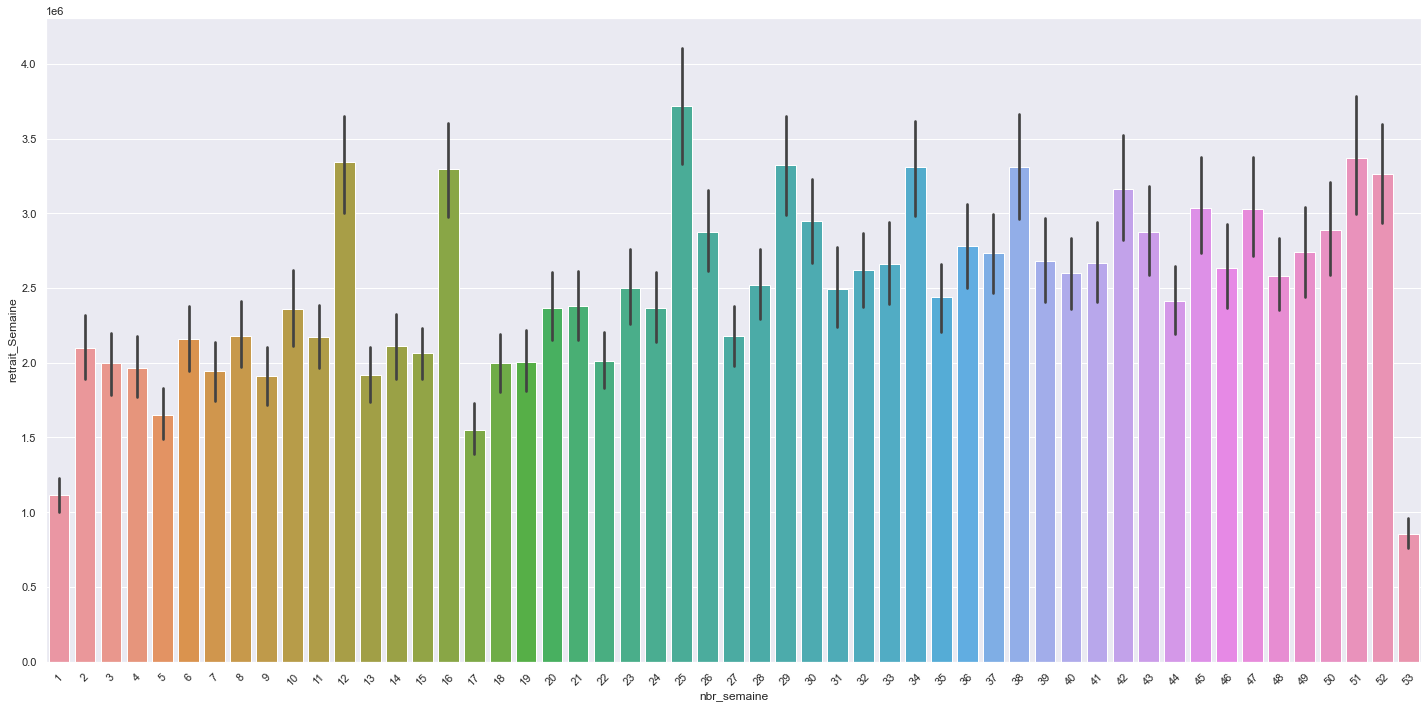

In [17]:
sns.set(style="darkgrid")

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df, x='nbr_semaine', y='retrait_Semaine')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 
plt.tight_layout() 
plt.show()

Les lignes noires verticales qui sortent du haut de chaque barre représentent l'intervalle de confiance autour de l'estimation moyenne, ce qui indique la variabilité ou l'incertitude autour de la moyenne estimée pour cette période,sont généralement calculées comme l'intervalle de confiance à 95 % pour la moyenne.

In [16]:
from scipy.stats import mode
import numpy as np
# Calculer le mode
mode_resultat = mode(df['retrait_Semaine']) 
print("Le mode est :", mode_resultat.mode[0])
# Calcul de la variance
variance = df['retrait_Semaine'].var()
print("La variance est:", variance)

Le mode est : 20000
La variance est: 6498081204777.116


-On observe des fluctuations notables dans le montant de retrait chaque semaine.

-Certains pics se démarquent.

-La variation du montant de retrait suggère des tendances ou des évenements spécifiques qui ont influencé les transactions: (semaine 12:début ramadan),(semaine 16:aid el fitr),(semaine 25:aid al adha),(semaine 29: muharam)...

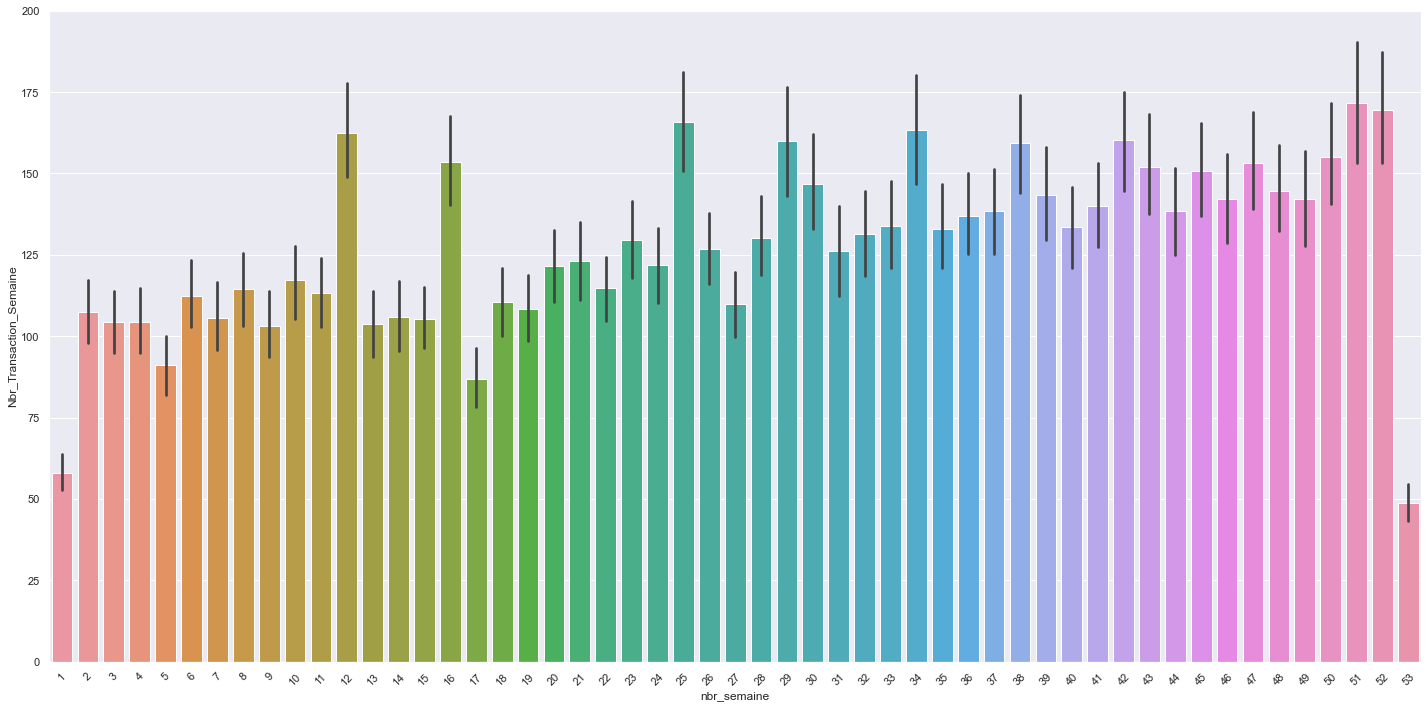

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df, x='nbr_semaine', y='Nbr_Transaction_Semaine')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  
plt.tight_layout()  
plt.show()

In [20]:
# Calculer le mode
mode_res = mode(df['Nbr_Transaction_Semaine']) 
print("Le mode est :", mode_res.mode[0])
# Calcul de la variance 
variance = df['Nbr_Transaction_Semaine'].var()
print("La variance est:", variance)

Le mode est : 1
La variance est: 14998.65933136782


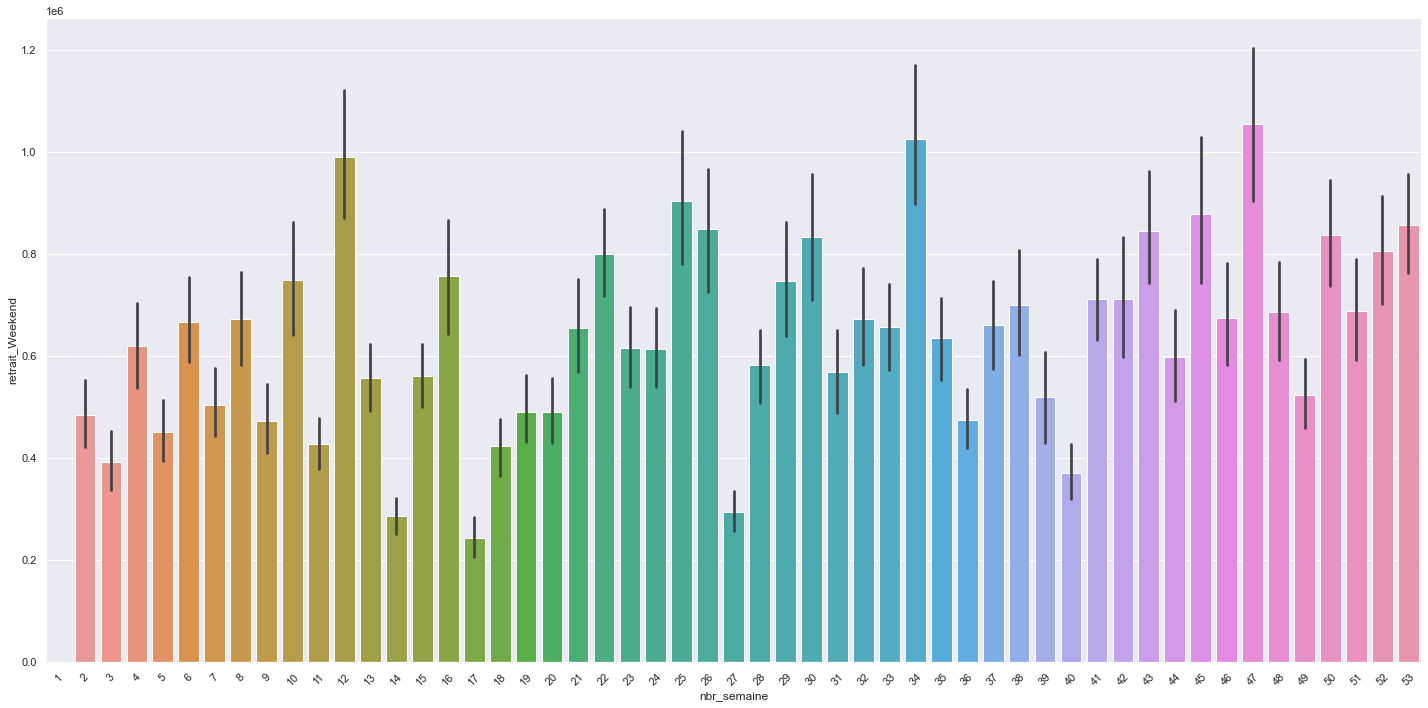

In [21]:
sns.set(style="darkgrid")

plt.figure(figsize=(20, 10)) 
ax = sns.barplot(data=df, x='nbr_semaine', y='retrait_Weekend')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  

plt.tight_layout() 
plt.show()

In [22]:
# Calculer le mode
mode_res = mode(df['retrait_Weekend']) 
print("Le mode est :", mode_res.mode[0])
# Calcul de la variance 
variance = df['retrait_Weekend'].var()
print("La variance est:", variance)

Le mode est : 0
La variance est: 759581406206.6923


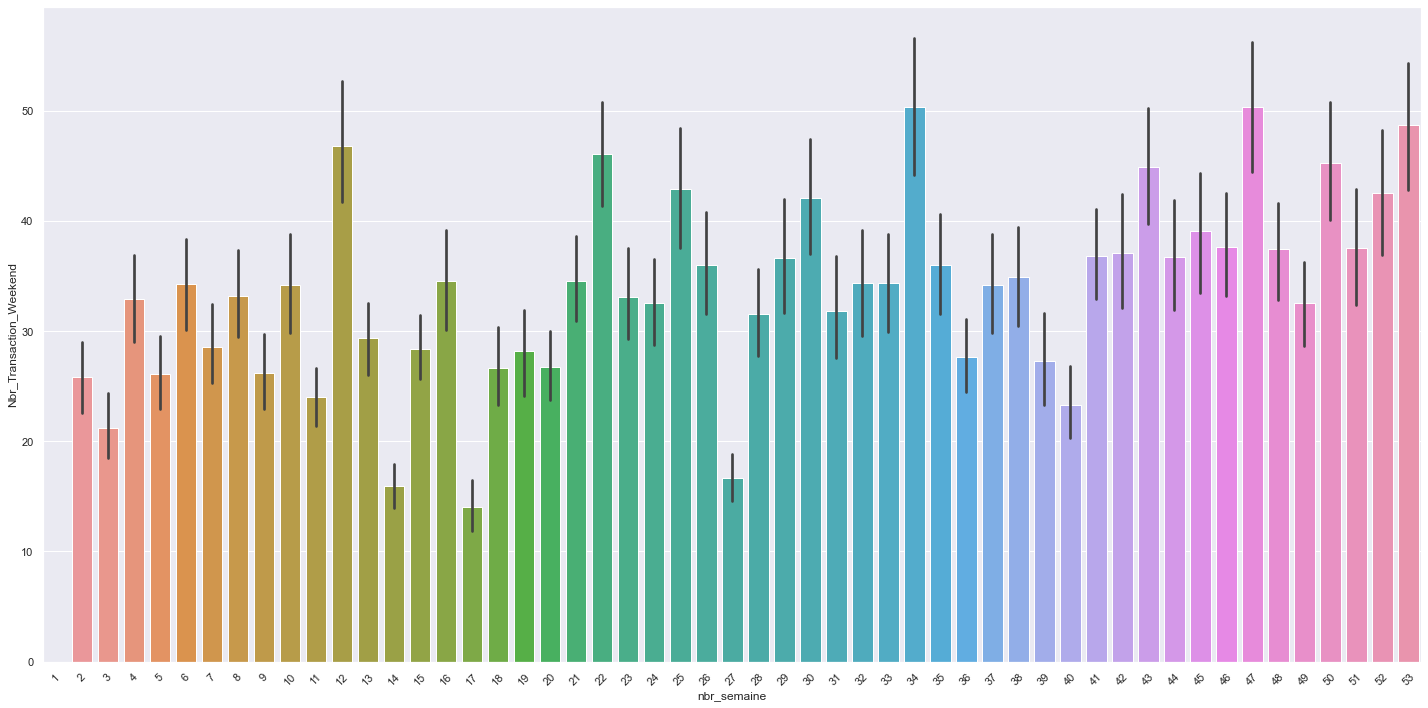

In [23]:
sns.set(style="darkgrid")

plt.figure(figsize=(20, 10)) 
ax = sns.barplot(data=df, x='nbr_semaine', y='Nbr_Transaction_Weekend')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  

plt.tight_layout() 
plt.show()

In [24]:
# Calculer le mode
mode_res = mode(df['retrait_Weekend']) 
print("Le mode est :", mode_res.mode[0])

Le mode est : 0


In [25]:
import pandas as pd
from tabulate import tabulate

# Groupez les données par semaine et calculez les statistiques descriptives
weekly_stats = df.groupby('nbr_semaine').agg({
    'retrait_Semaine': ['mean', 'std', 'min', 'max'],
    'Nbr_Transaction_Semaine': ['mean', 'std', 'min', 'max'],
    'retrait_Weekend': ['mean', 'std', 'min', 'max'],
})

# Convertir les statistiques en DataFrame
weekly_stats_df = pd.DataFrame(weekly_stats)

# Afficher les statistiques par semaine sous forme de tableaux pour chaque variable
for column in weekly_stats_df.columns.levels[0]:
    print(f"\nStatistiques pour la variable '{column}':\n")
    print(tabulate(weekly_stats_df[column], headers="keys", tablefmt="grid"))


Statistiques pour la variable 'retrait_Semaine':

+---------------+------------------+------------------+-------+------------+
|   nbr_semaine |             mean |              std |   min |        max |
+===============+==================+==================+=======+============+
|             1 |      1.11175e+06 |      1.07625e+06 |  1000 | 7.829e+06  |
+---------------+------------------+------------------+-------+------------+
|             2 |      2.10118e+06 |      2.03121e+06 |  2000 | 1.5471e+07 |
+---------------+------------------+------------------+-------+------------+
|             3 |      1.99924e+06 |      1.96501e+06 |  1000 | 1.0133e+07 |
+---------------+------------------+------------------+-------+------------+
|             4 |      1.96461e+06 |      1.97773e+06 | 22000 | 1.3214e+07 |
+---------------+------------------+------------------+-------+------------+
|             5 |      1.64935e+06 |      1.60519e+06 |  5000 | 1.1311e+07 |
+---------------+--------

## Analyse de normalité

### Caractéristiques à calculer pour vérifier la normalité:

On va calculer le Skewness et le Kurtosis :

-Skewness (asymétrie): mesure l'asymétrie d'une distribution d'une variable aléatoire.

-Kurtosis (aplatissement): mesure la queue d'une distribution d'une variable aléatoire.

Dans ce qui suivra je vais utilisé le kurtosis normalisé de fisher.

In [26]:
# Créez un DataFrame avec uniquement les variables quantitatives
variables_quantitatives = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                           'Nbr_Transaction_Weekend']
df_quantitatives = df[variables_quantitatives]
df_quantitatives.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
retrait_Semaine,2.107978,6.692834
Nbr_Transaction_Semaine,1.879145,5.198219
retrait_Weekend,2.709682,10.874863
Nbr_Transaction_Weekend,2.156420,6.338994


pour la variable 'retrait_Semaine':

-skewness=2.11 elle est positive cela indique une asymétrie vers la droite. la majorité des valeurs sont concentrées à gauche et qu'il y a quelques valeurs elevées à droite.

-kurtosis=6.69 > 0 , cela signifie que sa distribution est rétrécie, les valeurs sont plus regroupées vers la moyenne.

##### on peut dire que la distribution de la variable 'retrait semaine' n'est pas normale.

### Analyse graphique pour vérifier la normalité:

##### Histogramme et courbe de densité:

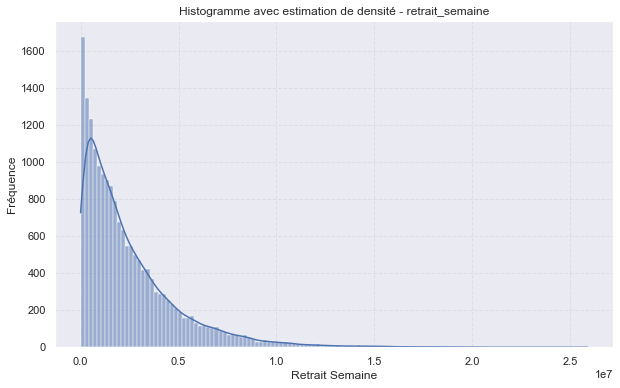

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = 'pastel'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='retrait_Semaine', kde=True,  palette =palette)
plt.title('Histogramme avec estimation de densité - retrait_semaine')
plt.xlabel('Retrait Semaine')
plt.ylabel('Fréquence')
# Modifier la couleur de la grille
plt.grid(True, linestyle='--', alpha=0.5, color='lightgrey')
plt.show()

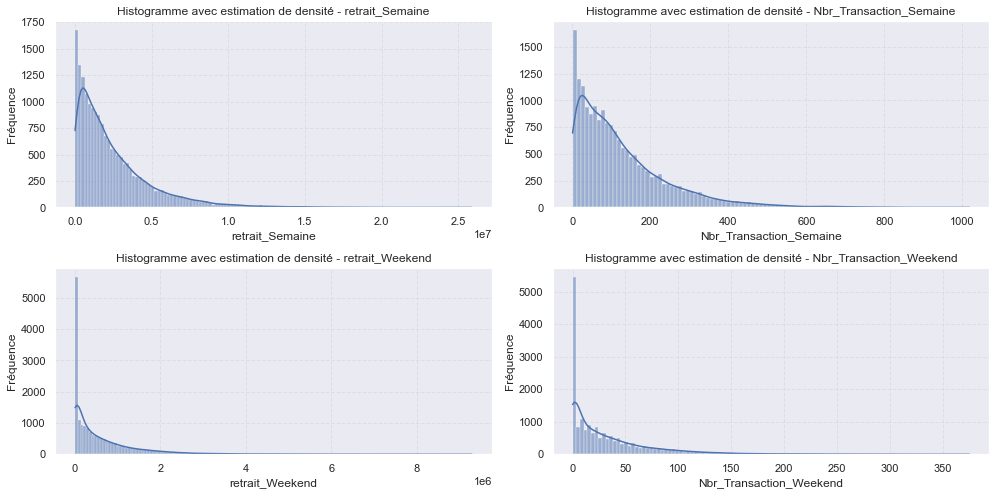

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = 'pastel'
variables = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
             'Nbr_Transaction_Weekend']

plt.figure(figsize=(14, 10))

# Création des histogrammes pour chaque variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 2, i)  # 3 lignes, 2 colonnes, position i
    sns.histplot(data=df, x=var, kde=True, palette=palette)
    plt.title(f'Histogramme avec estimation de densité - {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.grid(True, linestyle='--', alpha=0.5, color='lightgrey')

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

plt.show()

##### Q-Q plot:

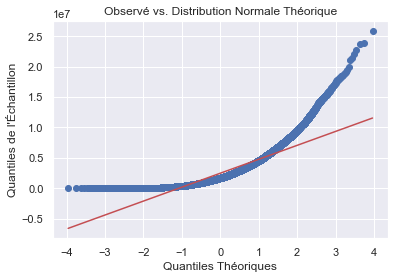

In [36]:
import matplotlib.pyplot as plt
from scipy import stats  
# Créez un QQ plot pour visualiser la comparaison
stats.probplot(df['retrait_Semaine'], dist="norm", plot=plt)
plt.title("Observé vs. Distribution Normale Théorique")
plt.xlabel("Quantiles Théoriques")
plt.ylabel("Quantiles de l'Échantillon")
plt.show()

on voit que les points qui représentent les quantiles de l'échantillon s'écartent de la ligne droite qui représente la distribution normale, et donc la variable 'retrait_Semaine' ne suit pas la loi normale.

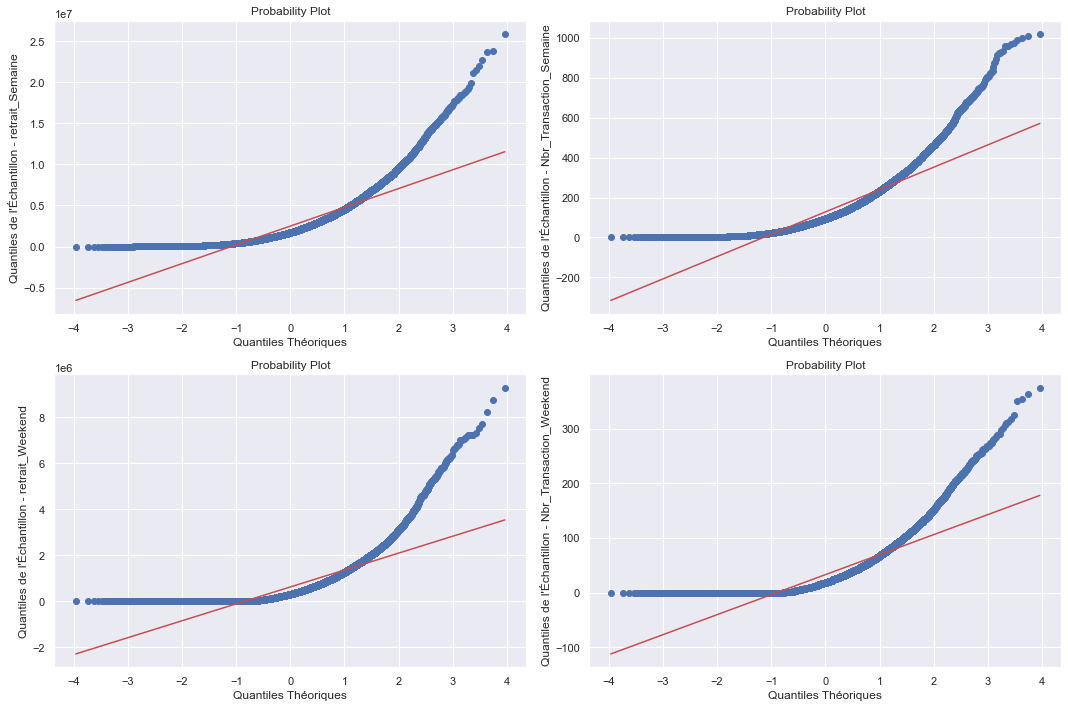

In [38]:
import matplotlib.pyplot as plt
import scipy.stats as stats

variables = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
             'Nbr_Transaction_Weekend']

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Aplatir les axes pour une itération facile
axes = axes.flatten()

# Création des QQ plots pour chaque variable
for i, var in enumerate(variables):
    stats.probplot(df[var], dist="norm", plot=axes[i])
    axes[i].set_xlabel("Quantiles Théoriques")
    axes[i].set_ylabel(f"Quantiles de l'Échantillon - {var}")

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()

plt.show()

### Les tests statistiques:

J'ai utilisé le test de kolmogorov car il convient aux echantillons de taille importantes.

la statistique de test de Kolmogorov-Smirnov mesure la distance entre la distribution empirique de ma variable "retrait_Semaine" et la distribution théorique de la distribution normale. Plus la valeur de test est faible, plus la distribution empirique se rapproche de la distribution théorique.

'p_value' est la valeur associée au test de Kolmogorov-Smirnov. Elle indique la probabilité que la distribution empirique de ma cariable "retrait_Semaine" soit compatible avec la distribution normale théorique. 

In [39]:
# Effectuez le test de Kolmogorov-Smirnov
ks_statistic, p_value = stats.kstest(df["retrait_Semaine"], 'norm')

print(f"Statistique de test de Kolmogorov-Smirnov : {ks_statistic:.4f}")
print(f"P-valeur : {p_value:.4f}")

# Interprétation
alpha = 0.05
if p_value < alpha:
    print("La distribution n'est pas normale (rejeter l'hypothèse nulle).")
else:
    print("La distribution suit une loi normale (ne pas rejeter l'hypothèse nulle).")

Statistique de test de Kolmogorov-Smirnov : 1.0000
P-valeur : 0.0000
La distribution n'est pas normale (rejeter l'hypothèse nulle).


## Identification des valeurs aberrantes:

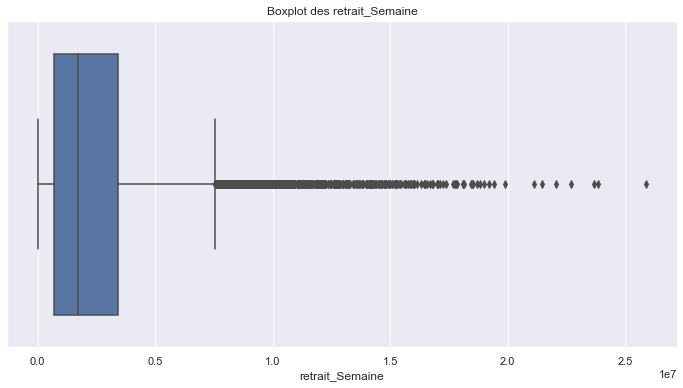

In [40]:
# Visualiser les outliers en utilisant un boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='retrait_Semaine')
plt.xlabel('retrait_Semaine')
plt.title("Boxplot des retrait_Semaine")
plt.show()

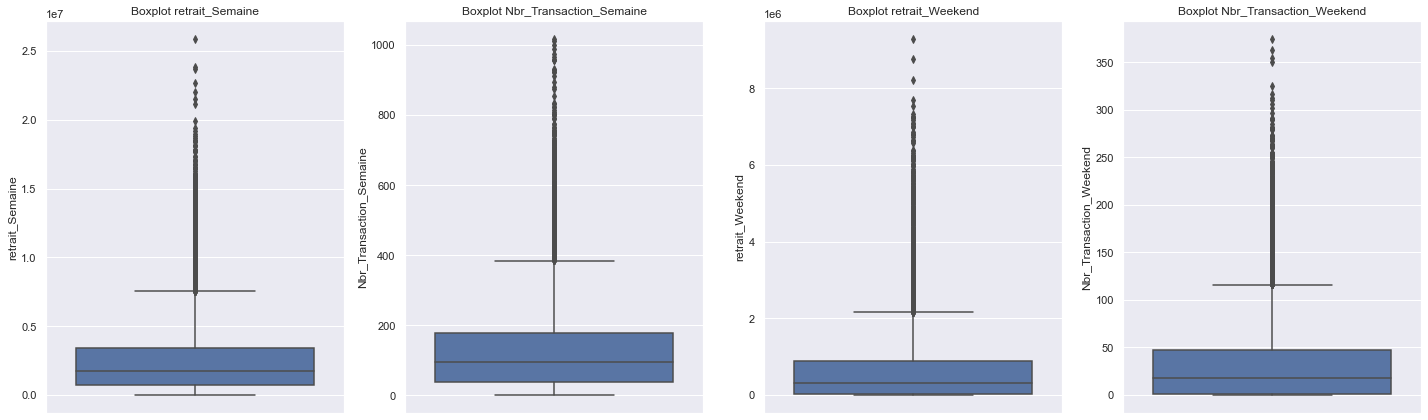

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création des boxplots univariés pour chaque variable numérique
fig, axes = plt.subplots(1, 4, figsize=(20, 6))  # Adapté pour 6 variables numériques

numeric_variables = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend', 
                     'Nbr_Transaction_Weekend']

for i, column in enumerate(numeric_variables):
    sns.boxplot(y=column, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot {column}")

plt.tight_layout()
plt.show()

In [43]:
#upper_lim=df['retrait_Semaine'].quantile(.95): Cette ligne calcule le 95e percentile 
#des valeurs dans la colonne 'retrait_Semaine'. Cela signifie que 95% des valeurs de 
#cette colonne sont inférieures ou égales à cette limite.
upper_lim=df['retrait_Semaine'].quantile(.95)
df_outliers=df[df['retrait_Semaine']>upper_lim]
df_outliers

,nbr_semaine,saison,Plage_horaire,Gab_Code,GabAgence,CodeAgence,CodeWilaya,position_Geographique,Nbr_Transaction_Semaine,retrait_Semaine,Nbr_Transaction_Weekend,retrait_Weekend,evenements
218,1,hiver,matin,800071027,"""SKIKDA \r""",17600,21,est,377,7829000,0,0,jour de lan
431,2,hiver,matin,800045027,"""HUSSEIN DEY \r""",17350,16,nord,423,9028000,108,2283000,nouvel an amazigh
432,2,hiver,matin,800046027,"""ANNABA II \r""",17360,23,est,538,14222000,150,3120000,nouvel an amazigh
436,2,hiver,matin,800071027,"""SKIKDA \r""",17600,21,est,678,15471000,13,263000,nouvel an amazigh
440,2,hiver,matin,800078027,"""ARZEW \r""",17670,31,ouest,333,7851000,76,2094000,nouvel an amazigh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079,52,hiver,matin,800131027,"""Canstantineadl \r""",17530,25,est,644,12603000,1,2000,inconnu
18100,52,hiver,après-midi,800046027,"""ANNABA II \r""",17360,23,est,460,10637000,0,0,inconnu
18101,52,hiver,après-midi,800131027,"""Canstantineadl \r""",17530,25,est,639,10470000,0,0,inconnu
18103,52,hiver,après-midi,800176027,"""ORAN SOUMAM \r""",17440,31,ouest,382,8334000,0,0,inconnu


In [45]:
from sklearn.ensemble import IsolationForest

# Liste des noms des variables numériques
variables_numeriques = ['retrait_Semaine', 'Nbr_Transaction_Semaine', 'retrait_Weekend']

# Paramètres de l'Isolation Forest
contamination = 0.05  # Proportion d'outliers attendue dans les données
random_state = 42  # Pour assurer la reproductibilité des résultats

# Initialisation d'un dictionnaire pour enregistrer les indices des outliers pour chaque variable
indices_outliers_par_variable = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Création du modèle Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination, random_state=random_state)
    
    # Ajustement du modèle aux données
    isolation_forest.fit(df[[variable]])
    
    # Prédiction des outliers
    df['outlier_' + variable] = isolation_forest.predict(df[[variable]])

# Affichage des outliers détectés pour chaque variable et enregistrement des indices
for variable in variables_numeriques:
    print(f"Outliers détectés pour la variable '{variable}':")
    print(df[df['outlier_' + variable] == -1][[variable]])

Outliers détectés pour la variable 'retrait_Semaine':
       retrait_Semaine
218            7829000
431            9028000
432           14222000
436           15471000
440            7851000
...                ...
18079         12603000
18100         10637000
18101         10470000
18103          8334000
18159          8552000

[921 rows x 1 columns]
Outliers détectés pour la variable 'Nbr_Transaction_Semaine':
       Nbr_Transaction_Semaine
218                        377
431                        423
432                        538
436                        678
460                        376
...                        ...
18067                      366
18079                      644
18100                      460
18101                      639
18103                      382

[920 rows x 1 columns]
Outliers détectés pour la variable 'retrait_Weekend':
       retrait_Weekend
365            2268000
368            2317000
429            3606000
432            3120000
435            2686

In [46]:
from sklearn.ensemble import IsolationForest

# Liste des noms des variables numériques
variables_numeriques = ['retrait_Semaine']
# Paramètres de l'Isolation Forest
contamination = 0.05  # Proportion d'outliers attendue dans les données
random_state = 42  # Pour assurer la reproductibilité des résultats

# Initialisation d'un dictionnaire pour enregistrer les indices des outliers pour chaque variable
indices_outliers_par_variable = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Création du modèle Isolation Forest
    isolation_forest = IsolationForest(contamination=contamination, random_state=random_state)
    
    # Ajustement du modèle aux données
    isolation_forest.fit(df[[variable]])
    
    # Prédiction des outliers
    df['outlier_' + variable] = isolation_forest.predict(df[[variable]])
    
    # Enregistrement des indices des outliers pour la variable actuelle
    indices_outliers_par_variable[variable] = df.index[df['outlier_' + variable] == -1].tolist()

# Comptage des valeurs aberrantes par semaine pour chaque variable
aberrant_count_by_week = {}

# Boucle sur chaque variable numérique
for variable in variables_numeriques:
    # Récupération des semaines correspondant aux valeurs aberrantes
    semaines_aberrantes = df.loc[df['outlier_' + variable] == -1, 'nbr_semaine']
    
    # Comptage des valeurs aberrantes par semaine
    aberrant_count_by_week[variable] = semaines_aberrantes.value_counts()

# Affichage des semaines et du nombre de valeurs aberrantes pour chaque variable
for variable, aberrant_count in aberrant_count_by_week.items():
    print(f"Nombre de valeurs aberrantes pour la variable '{variable}':")
    print(aberrant_count)
    
    # Vérification de la présence d'un événement pour chaque semaine 
    for semaine, effectif in aberrant_count.items():
        evenement_correspondant = df.loc[df['nbr_semaine'] == semaine, 'evenements'].iloc[0]
        if pd.notna(evenement_correspondant):
            print(f"Semaine {semaine} : Événement correspondant - {evenement_correspondant}")
        else:
            print(f"Semaine {semaine} : Aucun événement correspondant")
    
    print("\n")

Nombre de valeurs aberrantes pour la variable 'retrait_Semaine':
25    50
38    40
16    40
29    39
12    38
51    38
34    38
47    31
52    31
42    30
30    28
45    26
43    26
50    21
36    21
37    21
26    21
32    20
48    20
40    20
33    19
49    19
39    18
23    17
28    17
20    17
41    16
46    15
31    15
10    14
8     14
21    13
24    12
44    10
11    10
35    10
6      9
4      9
3      9
27     8
19     7
7      7
2      6
17     6
14     6
22     5
9      5
13     3
18     2
5      2
15     1
1      1
Name: nbr_semaine, dtype: int64
Semaine 25 : Événement correspondant - aid el Adha
Semaine 38 : Événement correspondant - mawlid
Semaine 16 : Événement correspondant - aid el fitr
Semaine 29 : Événement correspondant - muharram
Semaine 12 : Événement correspondant - ramadan
Semaine 51 : Événement correspondant - inconnu
Semaine 34 : Événement correspondant - inconnu
Semaine 47 : Événement correspondant - inconnu
Semaine 52 : Événement correspondant - inconnu
Sema

👉 Le deuxieme type de variable que je vais explorer est les variables qualitatives:

##### 'saison', 'Plage_horaire' , 'Gab_Code' , 'GabAgence' ,'CodeWilaya', 'position_Geographique' , 'evenements'

In [47]:
df.saison.value_counts(dropna=False)

hiver        4823
printemps    4732
été          4542
automne      4340
Name: saison, dtype: int64

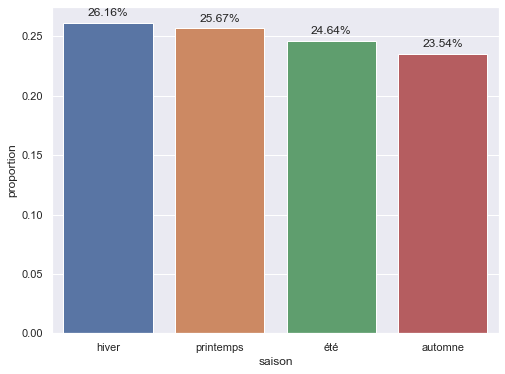

In [48]:
# Calculer la proportion de chaque saison
prop_season = df["saison"].value_counts(normalize=True).reset_index()
prop_season.columns = ["saison", "proportion"]

# Tracer le graphique à barres
plt.figure(figsize=(8,6))
ax = sns.barplot(x="saison", y="proportion", data=prop_season)

# Ajouter les proportions sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

En résumé, les retraits sont assez répartis tout au long de l'année, mais ils semblent être légèrement plus fréquents en hiver et au printemps et je suggère que c'est a cause de la présence de plusieurs evenements pendant ces deux saisons de l'année , et un peu moins fréquents en été et en automne.

In [49]:
df.Plage_horaire.value_counts(dropna=False)

après-midi    4665
matin         4659
midi          4636
soir          4477
Name: Plage_horaire, dtype: int64

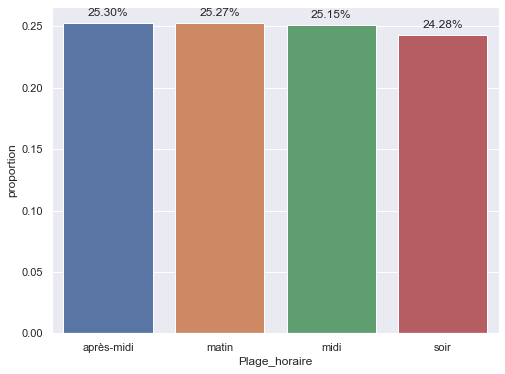

In [50]:
# Calculer la proportion de chaque plage horaire
prop_season = df["Plage_horaire"].value_counts(normalize=True).reset_index()
prop_season.columns = ["Plage_horaire", "proportion"]

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Plage_horaire", y="proportion", data=prop_season)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Les operations de retrait sont assez uniformément répartis tout au long de la journée, avec des proportions similaires le matin (25.27%), l'après-midi (25.30%) et le midi (25.15%), tandis que le soir représente une légère baisse (24.28%).

In [51]:
df.position_Geographique.value_counts(dropna=False)

nord     9079
est      5061
ouest    3888
sud       409
Name: position_Geographique, dtype: int64

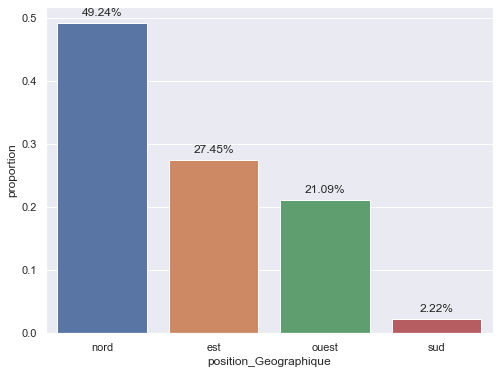

In [52]:
# Calculer la proportion de chaque position geographique
prop_season = df["position_Geographique"].value_counts(normalize=True).reset_index()
prop_season.columns = ["position_Geographique", "proportion"]

plt.figure(figsize=(8,6))
ax = sns.barplot(x="position_Geographique", y="proportion", data=prop_season)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

La majorité des transactions de retrait proviennent de la région nord (49.24%), suivie de loin par la région est (27.45%). La région ouest représente une part relativement plus faible (21.09%), tandis que la région sud est marginale, ne représentant que 2.22% des transactions.

In [53]:
df.CodeWilaya.value_counts(dropna=False)

16    7893
31    2036
6     1245
19    1036
25     798
9      446
13     424
27     420
22     416
42     415
23     410
30     409
21     397
2      212
34     212
10     212
15     212
18     212
7      211
35     209
14     200
29     180
26     116
28     116
Name: CodeWilaya, dtype: int64

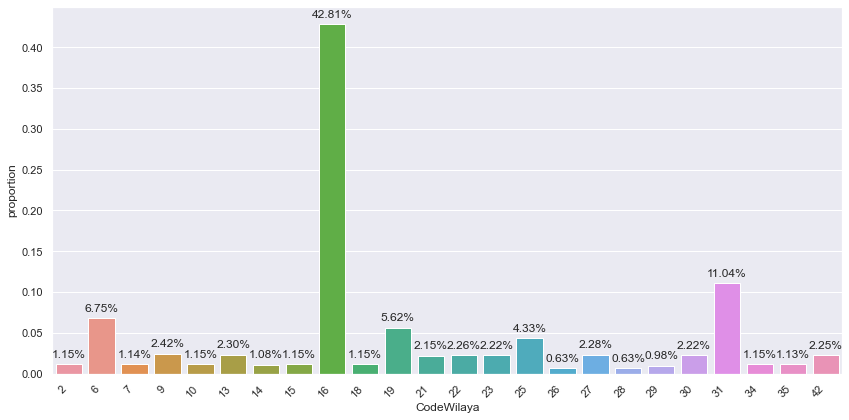

In [58]:
# Calculer la proportion de chaque wilaya
prop_wilaya = df["CodeWilaya"].value_counts(normalize=True).reset_index()
prop_wilaya.columns = ["CodeWilaya", "proportion"]

plt.figure(figsize=(12, 6))  # Ajustement de la taille du graphique
ax = sns.barplot(x="CodeWilaya", y="proportion", data=prop_wilaya)

# Ajouter les pourcentages sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajuster l'espacement entre les barres
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotation des étiquettes à 45 degrés

plt.tight_layout()  # Pour un meilleur espacement des sous-graphiques
plt.show()

In [56]:
df.GabAgence.value_counts(dropna=False)

"DAR EL BEIDA                            \r"    1018
"SETIF MALL                              \r"     824
"LES SOURCES                             \r"     634
"BEJAIA                                  \r"     619
"CONSTANTINE                             \r"     586
"ORAN USTO                               \r"     582
"CHERAGA                                 \r"     580
"AGENCE HO.BAB EZZOUAR                   \r"     460
"BAB EZZOUAR                             \r"     444
"HYDRA                                   \r"     432
"TLEMCEN                                 \r"     424
"SIDI YAHIA                              \r"     424
"ROUIBA                                  \r"     424
"HUSSEIN DEY                             \r"     424
"ORAN SOUMAM                             \r"     421
"MOSTAGHANEM                             \r"     420
"DIDOUCHE                                \r"     420
"DELY BRAHIM                             \r"     420
"BORDJ EL KIFFAN                         \r"  

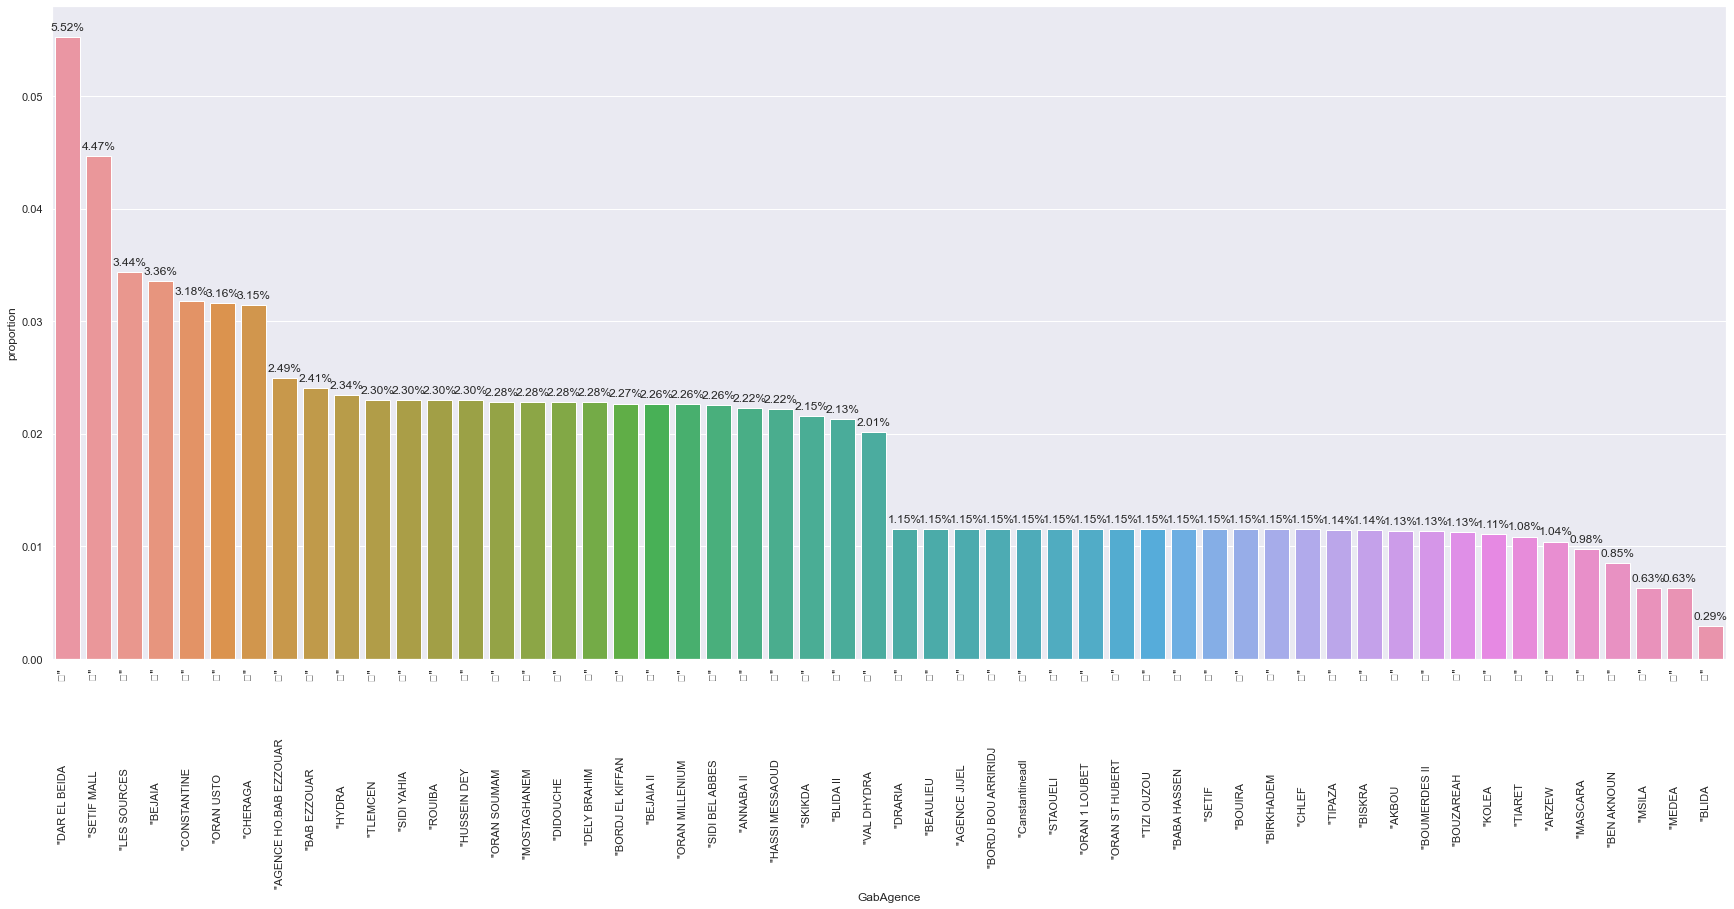

In [57]:
import warnings

# Ignorer les avertissements de runtime pour les glyphes manquants
warnings.filterwarnings("ignore", category=RuntimeWarning)

prop_geographique = df["GabAgence"].value_counts(normalize=True).reset_index()
prop_geographique.columns = ["GabAgence", "proportion"]

plt.figure(figsize=(30, 12))

# Tracer le graphique à barres
ax = sns.barplot(x="GabAgence", y="proportion", data=prop_geographique)

# Ajouter les pourcentages sur les barres
for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.show()

In [59]:
df.Gab_Code.value_counts(dropna=False)

800005027    212
800208027    212
800214027    212
800218027    212
800225027    212
            ... 
800230027     39
800009027     32
800242027     28
800229027     21
800193027     10
Name: Gab_Code, Length: 98, dtype: int64

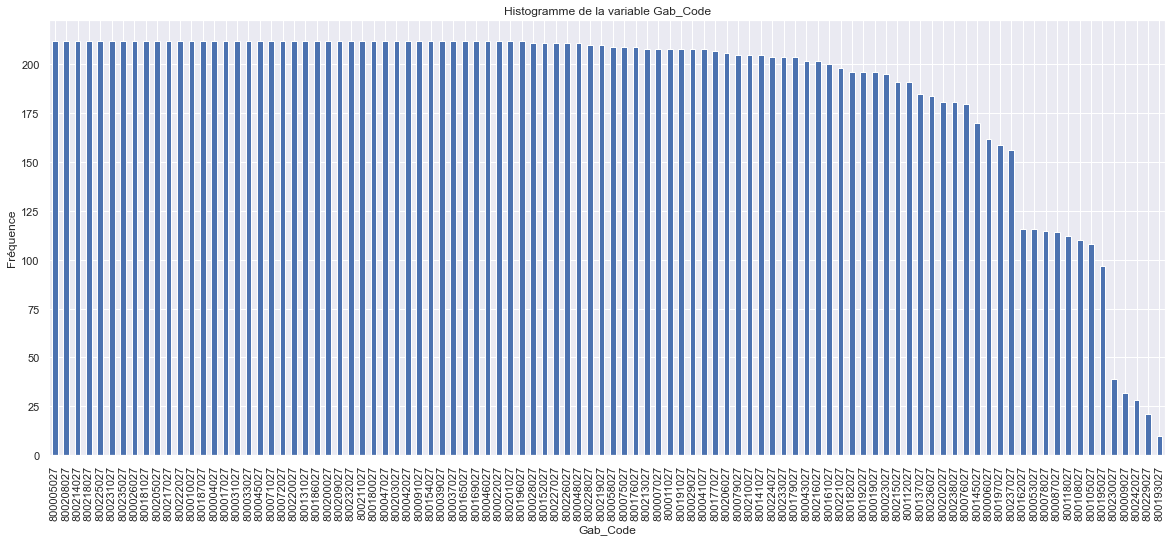

In [60]:
import matplotlib.pyplot as plt

counts = df['Gab_Code'].value_counts()

plt.figure(figsize=(20,8))
counts.plot(kind='bar')
plt.title('Histogramme de la variable Gab_Code')
plt.xlabel('Gab_Code')
plt.ylabel('Fréquence')
plt.xticks(rotation=90) 
plt.show()

In [61]:
df.evenements.value_counts(dropna=False)

inconnu                      13103
ramadan                       1445
aid el Adha                    370
aid el fitr                    366
journnée des travailleurs      366
journée de la femme            365
nouvel an amazigh              361
muharram                       355
jour de lan                    353
jour independance              348
jour de révolution             338
achoura                        334
mawlid                         333
Name: evenements, dtype: int64

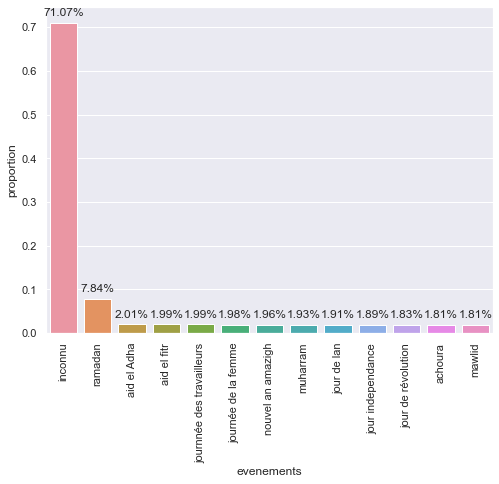

In [62]:
prop_season = df["evenements"].value_counts(normalize=True).reset_index()
prop_season.columns = ["evenements", "proportion"]

plt.figure(figsize=(8,6))
ax = sns.barplot(x="evenements", y="proportion", data=prop_season)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

In [63]:
filtered_df = df[df['evenements'] != 'inconnu']
value_counts = filtered_df['evenements'].value_counts()

print(value_counts)

ramadan                      1445
aid el Adha                   370
aid el fitr                   366
journnée des travailleurs     366
journée de la femme           365
nouvel an amazigh             361
muharram                      355
jour de lan                   353
jour independance             348
jour de révolution            338
achoura                       334
mawlid                        333
Name: evenements, dtype: int64


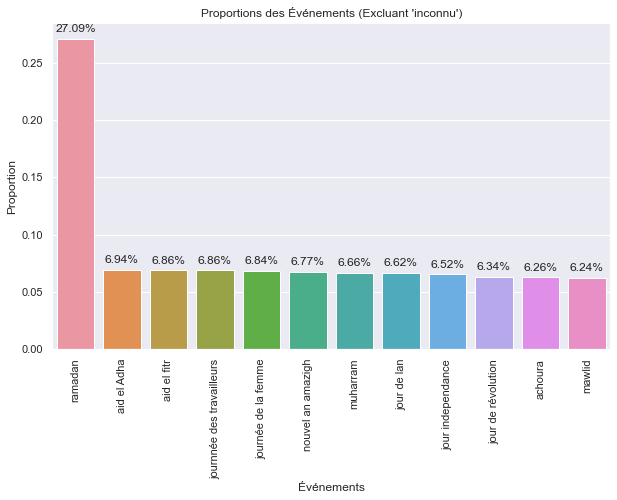

In [65]:
filtered_df = df[df['evenements'] != 'inconnu']

# Calculer les proportions des événements
prop_season = filtered_df["evenements"].value_counts(normalize=True).reset_index()
prop_season.columns = ["evenements", "proportion"]

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="evenements", y="proportion", data=prop_season)

for p in ax.patches:
    ax.annotate(format(p.get_height(), ".2%"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Personnaliser l'affichage
plt.title("Proportions des Événements (Excluant 'inconnu')")
plt.xlabel("Événements")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.show()